## Libraries

In [1]:
## Data Manipulation, Viz
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
## Encoding, metrics, Normalization
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics 
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
## ML Models 
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import Lasso
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
import pickle
import joblib

In [3]:
## Cleaned Data with No Null Values and Outliers
data = pd.read_csv(r"C:\Users\letss\Desktop\UMBC CLASSES\Spring2023\Capstone\Dataset\veh_ML.csv")
data.head()

,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state
0,6000,2017.0,ford,sierra 1500 crew cab slt,good,8 cylinders,gas,92633.941756,clean,automatic,4wd,full-size,sedan,white,az
1,11900,2017.0,ford,sierra 1500 crew cab slt,good,8 cylinders,gas,92633.941756,clean,automatic,4wd,full-size,sedan,white,ar
2,21000,2017.0,ford,sierra 1500 crew cab slt,good,8 cylinders,gas,92633.941756,clean,automatic,4wd,full-size,sedan,white,fl
3,1500,2017.0,ford,sierra 1500 crew cab slt,good,8 cylinders,gas,92633.941756,clean,automatic,4wd,full-size,sedan,white,ma
4,4900,2017.0,ford,sierra 1500 crew cab slt,good,8 cylinders,gas,92633.941756,clean,automatic,4wd,full-size,sedan,white,nc


## Categorical Encoding 
 
  **Label Encoding**

*   If the variable has a nominal (unordered) category, one-hot encoding is typically used. If the variable has an ordinal (ordered) category, label encoding can be used. It is important to note that some algorithms, such as tree-based models, can handle categorical data without encoding.


In [4]:
## Label Encoder Object Instantiation
## Selecting Categorical Columns and then performing
char_c = data.select_dtypes(include = ['object','bool']).columns
Ce = LabelEncoder()
data[char_c] = data[char_c].apply(Ce.fit_transform)

In [5]:
data.describe()

,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state
count,381221.000000,381221.000000,381221.000000,381221.000000,381221.000000,381221.000000,381221.000000,381221.000000,381221.000000,381221.000000,381221.000000,381221.000000,381221.000000,381221.000000,381221.000000
mean,17859.422062,2011.071709,18.631563,15136.478515,1.558849,4.649812,2.038353,92113.251802,0.131756,0.378665,0.533704,1.052009,6.675857,5.639613,23.562178
std,12814.066807,9.363635,11.566839,7111.390832,0.930482,1.246447,0.723101,60517.847458,0.734360,0.745430,0.727149,0.393636,3.729863,4.120063,15.118771
min,1.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7000.000000,2008.000000,10.000000,9943.000000,1.000000,3.000000,2.000000,39649.000000,0.000000,0.000000,0.000000,1.000000,4.000000,1.000000,9.000000
50%,14995.000000,2013.000000,14.000000,15288.000000,2.000000,5.000000,2.000000,88606.000000,0.000000,0.000000,0.000000,1.000000,9.000000,8.000000,23.000000
75%,26990.000000,2017.000000,28.000000,21506.000000,2.000000,6.000000,2.000000,134552.000000,0.000000,0.000000,1.000000,1.000000,9.000000,10.000000,37.000000
max,58288.000000,2022.000000,41.000000,26828.000000,5.000000,7.000000,4.000000,279715.000000,5.000000,2.000000,2.000000,3.000000,12.000000,11.000000,50.000000


In [6]:
data.head(5)

,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state
0,6000,2017.0,13,22047,2,6,2,92633.941756,0,0,0,1,9,10,3
1,11900,2017.0,13,22047,2,6,2,92633.941756,0,0,0,1,9,10,2
2,21000,2017.0,13,22047,2,6,2,92633.941756,0,0,0,1,9,10,9
3,1500,2017.0,13,22047,2,6,2,92633.941756,0,0,0,1,9,10,19
4,4900,2017.0,13,22047,2,6,2,92633.941756,0,0,0,1,9,10,27


In [7]:
trial3_data = data.drop('price',axis=1)

In [8]:
## saving encoded dataframe as a pickle file
with open('encoded_car_data.pkl', 'wb') as f:
    pickle.dump(trial3_data, f)

## Model Building

Creating Dependent and Independent Variables

In [9]:
X = data.drop("price",axis = 1) ## independent variables  
y = data["price"] ## Dependent Variable

In [10]:
## Train Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [11]:
print(X_train.shape)
print(X_test.shape)

(255418, 14)
(125803, 14)


###### Scaling
* Scaling is typically done after encoding, as most encoding techniques result in numerical data. The choice of scaling technique depends on the distribution of the data and the requirements of the machine learning algorithm. If the data has a normal distribution and the scale is important, standardization is typically used. If the data does not have a normal distribution and needs to be scaled to a specific range, such as between 0 and 1, normalization is typically used. It is important to note that some algorithms, such as tree-based models, are invariant to the scale of the data and do not require scaling.


In [12]:
## Since the data is not Normally Distributed, Using Min Max-Normalization 
mm_scaler = MinMaxScaler()
## Calculate and Transform
X_train = mm_scaler.fit_transform(X_train) 
## use the same mean and variance as it is calculated from our training data to transform our test data.
X_test  = mm_scaler.transform(X_test) 

In [13]:
## Checking that Variables are Normalized or Not
pd.DataFrame(X_train).describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
count,255418.000000,255418.000000,255418.000000,255418.000000,255418.000000,255418.000000,255418.000000,255418.000000,255418.000000,255418.000000,255418.000000,255418.000000,255418.000000,255418.000000
mean,0.910533,0.453867,0.564517,0.311348,0.664363,0.509657,0.329162,0.026250,0.189415,0.265972,0.350428,0.556414,0.512911,0.470952
std,0.076528,0.282073,0.265102,0.186248,0.178104,0.181025,0.216338,0.146536,0.372996,0.362986,0.130715,0.310675,0.374399,0.302347
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.885246,0.243902,0.371589,0.200000,0.428571,0.500000,0.141738,0.000000,0.000000,0.000000,0.333333,0.333333,0.090909,0.180000
50%,0.926230,0.341463,0.570542,0.400000,0.714286,0.500000,0.316457,0.000000,0.000000,0.000000,0.333333,0.750000,0.727273,0.460000
75%,0.959016,0.682927,0.801625,0.400000,0.857143,0.500000,0.480845,0.000000,0.000000,0.500000,0.333333,0.750000,0.909091,0.740000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Linear Regression

In [15]:
## Linear Regression
lr = LinearRegression()
lr.fit(X_train,y_train)

## Predicting the Training Data
y_pred = lr.predict(X_train)
acc_train_lr = metrics.r2_score(y_train, y_pred)
print("Accuracy Score[R2]_Train  : ", acc_train_lr *100)

## Predicting the Test Data
y_pred = lr.predict(X_test)
acc_test_lr = metrics.r2_score(y_test, y_pred)
print("Accuracy Score[R2]_Test : ", acc_test_lr *100)

Accuracy Score[R2]_Train  :  41.67321323154647
Accuracy Score[R2]_Test :  41.52185664764537


In [16]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 7325.845394344652
MSE: 96015990.90975876
RMSE: 9798.774969849994


In [17]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [18]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
cross_val_score(LinearRegression(), X, y, cv=cv)

array([0.41251864, 0.41693738, 0.41243211, 0.41580833, 0.42036914])

## Decision Tree Regression

In [19]:
## DecisionTreeRegressor
dt = DecisionTreeRegressor()
dt.fit(X_train,y_train)

## Predicting the Training Data
y_pred = dt.predict(X_train)
acc_train_dt = metrics.r2_score(y_train, y_pred)
print("Accuracy Score[R2]_Train : ", acc_train_dt*100)

## Predicting the Test Data
y_pred = dt.predict(X_test)
acc_test_dt = metrics.r2_score(y_test, y_pred)
print("Accuracy Score[R2]_Test  : ", acc_test_dt*100)

Accuracy Score[R2]_Train :  99.94239146369351
Accuracy Score[R2]_Test  :  73.86248192529476


In [20]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 3015.4030367157393
MSE: 42915516.02011495
RMSE: 6550.993513972896


## Random Forest Regression

In [21]:
## RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(X_train,y_train)

## Predicting the Training Data
y_pred = rf.predict(X_train)
acc_train_rf = metrics.r2_score(y_train, y_pred)
print("Accuracy Score[R2]_Train : ", acc_train_rf*100)

## Predicting the Test Data
y_pred = rf.predict(X_test)
acc_test_rf = metrics.r2_score(y_test, y_pred)
print("Accuracy Score[R2]_Test  : ", acc_test_rf*100)

Accuracy Score[R2]_Train :  98.09653770323197
Accuracy Score[R2]_Test  :  86.79133744612076


In [22]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 2384.7636074903216
MSE: 21687467.33393466
RMSE: 4656.980495335433


## XgBoost Regression

In [28]:
## xgboost Regression
xg = XGBRegressor()
xg.fit(X_train,y_train)

## Predicting the Training Data
y_pred = xg.predict(X_train)
acc_train_xg = metrics.r2_score(y_train, y_pred)
print("Accuracy Score[R2]_Train : ", acc_train_xg*100)

## Predicting the Test Datas
y_pred = xg.predict(X_test)
acc_test_xg = metrics.r2_score(y_test, y_pred)
print("Accuracy Score[R2]_Test  : ", acc_test_xg*100)

Accuracy Score[R2]_Train :  82.30358057374703
Accuracy Score[R2]_Test  :  80.78928483079805


In [29]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 3466.685591979486
MSE: 31542312.175370887
RMSE: 5616.25428336101


## Lasso Regression

In [30]:
## Lasso Regression
from sklearn.linear_model import Lasso
la = Lasso()
la.fit(X_train,y_train)

## Predicting the Training Data
y_pred = la.predict(X_train)
acc_train_la = metrics.r2_score(y_train, y_pred)
print("Accuracy Score[R2]_Train : ", acc_train_la*100)

## Predicting the Test Datas
y_pred = la.predict(X_test)
acc_test_la = metrics.r2_score(y_test, y_pred)
print("Accuracy Score[R2]_Test  : ", acc_test_la*100)

Accuracy Score[R2]_Train :  41.672965901217964
Accuracy Score[R2]_Test  :  41.52362667531641


In [31]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 7326.61076680305
MSE: 96013084.67931043
RMSE: 9798.62667312672


## Dataframe with all Algorithms Accuracy

In [32]:
data_tb = pd.DataFrame({'Accuracy' : [acc_test_lr, acc_test_dt, acc_test_rf, acc_test_xg, acc_test_la]},
                        index = ['Linear Regression','Decision Tree', 'Random Forest', 'XGBoost', 'Lasso'])
data_tb.sort_values(by='Accuracy', ascending=False)*100

,Accuracy
Random Forest,86.791337
XGBoost,80.789285
Decision Tree,73.862482
Lasso,41.523627
Linear Regression,41.521857


## HyperParameter Tuning

In [34]:
## simple performance reporting function
def reg_performance(regressor, model_name):
    print(model_name)
    print('Best Score: ' + str(regressor.best_score_))
    print('Best Parameters: ' + str(regressor.best_params_))

**Linear Regression-HT**

In [35]:
lr = LinearRegression()
params = {
      'fit_intercept': [True, False],
      'n_jobs': [-1, 1, 2, 3, 4, 5]
}

In [36]:
reg_lr = RandomizedSearchCV(lr, param_distributions = params, cv = 3, verbose = True, n_jobs = 1, random_state = 0)
best_reg_lr = reg_lr.fit(X_train[:50000],y_train[:50000])
reg_performance(best_reg_lr,'LinearRegression')

Fitting 3 folds for each of 10 candidates, totalling 30 fits
LinearRegression
Best Score: 0.41493734161756546
Best Parameters: {'n_jobs': 4, 'fit_intercept': True}


In [38]:
## train using full dataset and best parameters
best_params = best_reg_lr.best_params_
lr = LinearRegression(fit_intercept = best_params['fit_intercept'],n_jobs = best_params['n_jobs'])
lr.fit(X_train,y_train)

LinearRegression(n_jobs=4)

In [39]:
## Predicting training data
y_pred=lr.predict(X_train)
accuracy = metrics.r2_score(y_train, y_pred)
print("Accuracy Score[R2]_Train : ", accuracy*100)

Accuracy Score[R2]_Train :  41.67321323154647


In [40]:
## Predicting the Test Data
y_pred = lr.predict(X_test)
accuracy_lr = metrics.r2_score(y_test, y_pred)
print("Accuracy Score[R2]_Test  : ", accuracy_lr*100)

Accuracy Score[R2]_Test  :  41.52185664764537


**Decision Tree - HT**

In [41]:
dr = DecisionTreeRegressor(random_state = 0)
params = {
    'max_depth': [20, 40, 60 ,80, 100],
    'criterion':['mse','friedman_mse'],
    'splitter': ['best','random']
}

reg_dr = RandomizedSearchCV(dr, param_distributions = params, cv = 3, verbose = True, n_jobs = 1, random_state = 0)
best_reg_dr = reg_dr.fit(X_train[:50000],y_train[:50000])
reg_performance(best_reg_dr,'DecisionTree')

Fitting 3 folds for each of 10 candidates, totalling 30 fits
DecisionTree
Best Score: 0.533367422691834
Best Parameters: {'splitter': 'best', 'max_depth': 20, 'criterion': 'friedman_mse'}


In [42]:
## train using full dataset and best parameters
best_params = best_reg_dr.best_params_
dt = DecisionTreeRegressor(max_depth = best_params['max_depth'],criterion = best_params['criterion'],random_state=0)
dt.fit(X_train,y_train)

DecisionTreeRegressor(criterion='friedman_mse', max_depth=20, random_state=0)

In [43]:
## Predicting training data
y_pred=dt.predict(X_train)
accuracy = metrics.r2_score(y_train, y_pred)
print("Accuracy Score[R2]_Train : ", accuracy*100)

Accuracy Score[R2]_Train :  93.74063391021576


In [44]:
## Predicting the Test Data
y_pred = dt.predict(X_test)
accuracy_dt = metrics.r2_score(y_test, y_pred)
print("Accuracy Score[R2]_Test  : ", accuracy_dt*100)

Accuracy Score[R2]_Test  :  75.49809378134435


**Random forest - HT**

In [15]:
rf = RandomForestRegressor(random_state = 0)
param_grid =  {                   'n_estimators': [int(x) for x in np.linspace(start = 200, stop = 2000, num = 5)],
                                  'max_depth': [15, 20, 25],
                                  'max_features': ['auto','sqrt'],
                                  'min_samples_leaf': [1, 2],
                                  'min_samples_split': [2, 5]
               }
                                  
reg_rf = RandomizedSearchCV(rf, param_distributions = param_grid, cv = 3,  verbose = 2, n_jobs = -1, random_state=0)
best_reg_rf = reg_rf.fit(X_train[:50000],y_train[:50000])
reg_performance(best_reg_rf,'Random Forest')

## train using full dataset and best parameters
best_params = reg_rf.best_params_
rf = RandomForestRegressor(n_estimators = best_params['n_estimators'],max_depth = best_params['max_depth'],max_features = best_params['max_features'],min_samples_leaf = best_params['min_samples_leaf'],min_samples_split = best_params['min_samples_split'], random_state=0)
rf.fit(X_train,y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Random Forest
Best Score: 0.7603627160228021
Best Parameters: {'n_estimators': 2000, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 25}


RandomForestRegressor(max_depth=25, min_samples_split=5, n_estimators=2000,
                      random_state=0)

In [17]:
## Predicting the Test Data
y_pred = rf.predict(X_test)
accuracy_rf  = metrics.r2_score(y_test, y_pred)
print("Accuracy Score[R2]_Test  : ", accuracy_rf*100)

Accuracy Score[R2]_Test  :  86.48946373231945


**XgBoost Regression - HT**

In [ ]:
xg = XGBRegressor(random_state = 0)
params = {
    'n_estimators': randint(100, 1000),
    'max_depth': [3, 4, 5],
    'learning_rate': [0.001, 0.1, 0.3],
    'subsample': [0.4,  0.8,  1.0],
    'colsample_bytree': [0.4,  0.8,  1.0]
        }

reg_xg = RandomizedSearchCV(xg, param_distributions = params, cv = 2, verbose = True, n_jobs = 1, random_state = 0)
best_reg_xg = reg_xg.fit(X_train[:50000],y_train[:50000])
reg_performance(best_reg_xg,'xgboost')

Fitting 2 folds for each of 10 candidates, totalling 20 fits
xgboost
Best Score: 0.7747032061358738
Best Parameters: {'colsample_bytree': 0.4, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 947, 'subsample': 0.4}


In [ ]:
best_reg_xg.best_params_

{'colsample_bytree': 0.4,
 'learning_rate': 0.1,
 'max_depth': 5,
 'n_estimators': 947,
 'subsample': 0.4}

In [ ]:
#train using full dataset and best parameters
best_params = best_reg_xg.best_params_
xg = XGBRegressor(n_estimators = best_params['n_estimators'], max_depth = best_params['max_depth'],learning_rate = best_params['learning_rate'],subsample = best_params['subsample'],colsample_bytree = best_params['colsample_bytree'], random_state=0)
xg.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.4, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=947, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=0, ...)

In [ ]:
## Predicting training data
y_pred=xg.predict(X_train)
accuracy = metrics.r2_score(y_train, y_pred)
print("Accuracy Score[R2]_Train : ", accuracy*100)

Accuracy Score[R2]_Train :  82.96691453879889


In [ ]:
## Predicting the Test Data
y_pred = xg.predict(X_test)
accuracy_xg = metrics.r2_score(y_test, y_pred)
print("Accuracy Score[R2]_Test  : ", accuracy_xg*100)

Accuracy Score[R2]_Test  :  81.4902374436205


**Lasso Regression - HT**

In [ ]:
la = Lasso(random_state = 0)
params = {
    'alpha': [1,2],
    'selection': ['random', 'cyclic'],
    'max_iter': [1000, 3000, 4000]
    }
reg_la = RandomizedSearchCV(la, param_distributions = params, cv = 3, verbose = True, n_jobs = 1, random_state = 0)
best_reg_la = reg_la.fit(X_train[:50000],y_train[:50000])
reg_performance(best_reg_la,'Lasso')

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Lasso
Best Score: 0.4163462418621356
Best Parameters: {'selection': 'random', 'max_iter': 4000, 'alpha': 1}


In [ ]:
#train using full dataset and best parameters
best_params = best_reg_la.best_params_
la = Lasso(selection = best_params['selection'],max_iter = best_params['max_iter'],random_state=0)
la.fit(X_train,y_train)

Lasso(max_iter=4000, random_state=0, selection='random')

In [ ]:
## Predicting training data
y_pred=la.predict(X_train)
accuracy = metrics.r2_score(y_train, y_pred)
print("Accuracy Score[R2]_Train : ", accuracy*100)

Accuracy Score[R2]_Train :  41.672965550520104


In [ ]:
## Predicting the Test Data
y_pred = la.predict(X_test)
accuracy_dt = metrics.r2_score(y_test, y_pred)
print("Accuracy Score[R2]_Test  : ", accuracy_dt*100)

Accuracy Score[R2]_Test  :  41.52363573489622


Visualizing Metrics of Different Models

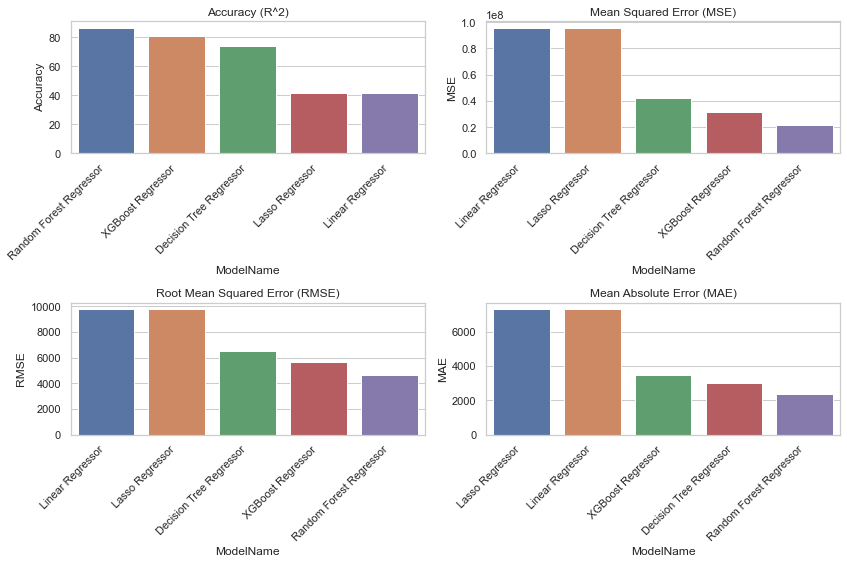

In [81]:
## Dataframe of All Metrcis of Different Model to Visualize
df = pd.DataFrame({
    'ModelName': ['Random Forest Regressor', 'XGBoost Regressor', 'Decision Tree Regressor', 'Lasso Regressor', 'Linear Regressor'],
    'Accuracy': [86.78, 80.78, 73.90, 41.52, 41.51],
    'MAE': [2382.29, 3466.68, 3008.64, 7326.61, 7325.84],
    'MSE': [21701516.81, 31542312.17, 42549793.55, 96013084.67, 96015990.90],
    'RMSE': [4658.48, 5616.25, 6523.02, 9798.62, 9798.77]
})

# sort the dataframes by performance metrics in ascending order
df_sorted_mae = df.sort_values('MAE', ascending=False)
df_sorted_mse = df.sort_values('MSE', ascending=False)
df_sorted_rmse = df.sort_values('RMSE', ascending=False)
df_sorted_acc = df.sort_values('Accuracy', ascending=False)

# set the overall figure size
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))


# create the fourth subplot for Accuracy
sns.barplot(x='ModelName', y='Accuracy', data=df_sorted_acc, ax=axs[0, 0])
axs[0, 0].set_xticklabels(axs[0, 0].get_xticklabels(), rotation=45, ha='right')
axs[0, 0].set_title('Accuracy (R^2)')

# create the second subplot for MSE
sns.barplot(x='ModelName', y='MSE', data=df_sorted_mse, ax=axs[0, 1])
axs[0, 1].set_xticklabels(axs[0, 1].get_xticklabels(), rotation=45, ha='right')
axs[0, 1].set_title('Mean Squared Error (MSE)')

# create the third subplot for RMSE
sns.barplot(x='ModelName', y='RMSE', data=df_sorted_rmse, ax=axs[1, 0])
axs[1, 0].set_xticklabels(axs[1, 0].get_xticklabels(), rotation=45, ha='right')
axs[1, 0].set_title('Root Mean Squared Error (RMSE)')


# create the first subplot for MAE
sns.barplot(x='ModelName', y='MAE', data=df_sorted_mae, ax=axs[1, 1])
axs[1, 1].set_xticklabels(axs[1, 1].get_xticklabels(), rotation=45, ha='right')
axs[1, 1].set_title('Mean Absolute Error (MAE)')

plt.tight_layout()
plt.show()


**Higher R-squared values and lower MAE, MSE, and RMSE values indicate better model performance.**
* Hence Random Forest Regressor Model  saved as the best model as Pickle File


### Save the Best Model 

In [18]:
import pickle
## File 
f = open('RandomForest_Regressor.pkl', 'wb')
# Dumping the model and will be used in streamlit webapp
pickle.dump(rf, f)